## Loading the data set

In [1]:
require(multtest)
data(golub)

Loading required package: multtest
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory mate

We will be usig the Gene Expression dataset from Golub et al (1999).

Gene expression data (3051 genes and 38 tumor mRNA samples) from the leukemia microarray study of Golub et al. (1999). Pre-processing was done as described in Dudoit et al. (2002). The R code for pre-processing is available in the file ../doc/golub.R.
Source: Golub et al. (1999). Molecular classification of cancer: class discovery and class prediction by gene expression monitoring, Science, Vol. 286:531-537. http://www-genome.wi.mit.edu/MPR/ .

In [2]:
golub.expr <- golub

# preliminar view of the data
head(golub.expr)

-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,⋯,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,⋯,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,⋯,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,⋯,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,⋯,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
2.64342,1.01416,1.70477,1.63845,-0.36075,1.73451,3.36576,0.96870,2.72368,-1.21583,⋯,-1.08902,-1.29865,1.73780,0.89347,-0.52883,-1.22168,0.90832,-1.39906,0.51266,1.36249


 `golub.names` is a matrix containing the names of the 3051 
 genes contained in `golub`. The three columns correspond to:
`index, ID and name`

In [3]:
row.names(golub.expr) = golub.gnames[,3]

`golub.cl` is a numeric vector indicating the tumor class, 27 acute lymphoblastic leukemia (ALL) cases (code 0) and 11 acute myeloid leukemia (AML) cases (code 1).

In [ ]:
colnames(golub.expr) = golub.cl

Now we need to set the sample sizes

In [4]:
n.ALL <- 27
n.AML <- 11

cancer.type <- c(rep('ALL', n.ALL), rep('AML', n.AML))

Adding the cancer type to the column name, for the display

In [5]:
colnames(golub.expr) <- cancer.type

In [6]:
head(golub.expr)

,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,⋯,AML,AML,AML,AML,AML,AML,AML,AML,AML,AML
AFFX-HUMISGF3A/M97935_MA_at,-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,-1.21583,⋯,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
AFFX-HUMISGF3A/M97935_MB_at,-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,-0.81257,⋯,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
AFFX-HUMISGF3A/M97935_3_at,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,⋯,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
AFFX-HUMRGE/M10098_5_at,3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,-1.21583,⋯,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
AFFX-HUMRGE/M10098_M_at,2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,-1.21583,⋯,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788
AFFX-HUMRGE/M10098_3_at,2.64342,1.01416,1.70477,1.63845,-0.36075,1.73451,3.36576,0.96870,2.72368,-1.21583,⋯,-1.08902,-1.29865,1.73780,0.89347,-0.52883,-1.22168,0.90832,-1.39906,0.51266,1.36249


t.test with a single gene

In [7]:
g <- 347

Alternatively, you can select a gene randomly

In [8]:
# g <- sample(1:nrow(golub.expr),1)
g.profile <- as.vector(as.matrix(golub.expr[g,]))

Draw a barplot with color-coded cancer type

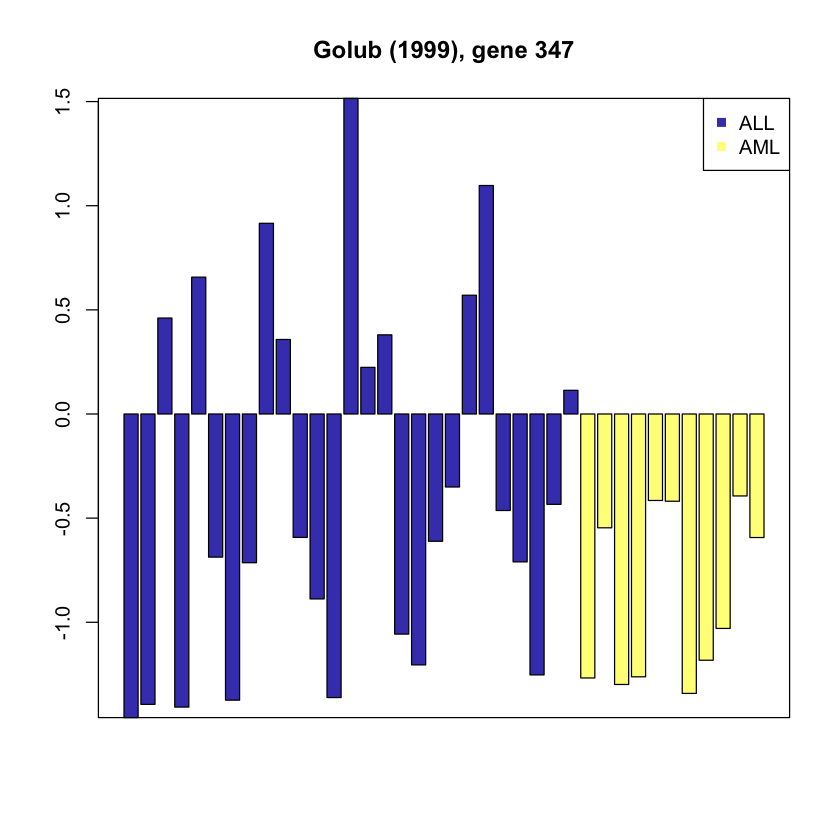

In [9]:
plot.col <- c('ALL'='#4444BB', 'AML'='#FFFF88')

barplot(g.profile, main=paste("Golub (1999), gene", g), 
        col=plot.col[cancer.type])
legend('topright', c("ALL","AML"),col=plot.col[c("ALL","AML")],
       pch=15, bty="o", bg='white')
box()

Separating the data in two vectors

In [10]:
sample.ALL <- g.profile[cancer.type=="ALL"]
sample.AML <- g.profile[cancer.type=="AML"]

**Compute manually ** the t test parameters (not necessary, just to practice!)

Estimate the population means

In [11]:
mean.est.ALL <- mean(sample.ALL)
mean.est.AML <- mean(sample.AML)

Compute the sample standard deviations 
The sd() function automatically computes the estimate corrected with sqrt(n-1)

In [12]:
sample.sd.ALL <- sd(sample.ALL) * sqrt((n.ALL-1)/n.ALL)
sample.sd.AML <- sd(sample.AML) * sqrt((n.AML-1)/n.AML)

Estimate the population standard deviation


In [13]:
sd.est.ALL <- sd(sample.ALL)
sd.est.AML <- sd(sample.AML)

Estimate the standard deviations on the means

In [14]:
sd.err.est.ALL <- sd(sample.ALL) / sqrt(n.ALL)
sd.err.est.AML <- sd(sample.AML) / sqrt(n.AML)

Estimate the standard deviation of the difference between two means, according to Student's formula

In [15]:
diff.sd.est <- sqrt((n.ALL*sample.sd.ALL^2 + n.AML*sample.sd.AML^2) * (1/n.ALL + 1/n.AML) /(n.ALL+n.AML-2))

Compute t.obs

In [16]:
d <- abs(mean.est.ALL - mean.est.AML)
t.obs.Student <- d / diff.sd.est

Compute the P- vale.
Since we are performing the two-tail test, the single-tail probability has to be multiplied by 3 in order to obtai the alpha risk

In [17]:
P.val.Student <- 2 * pt(q = t.obs.Student, df = n.ALL + n.AML-2, lower.tail = F)

### This is what you should be doing... FAST! 

### Apply the Student-Fischer t-test (this assumes that the two populations have equal variance).

In [18]:
t.student <- t.test(sample.ALL,sample.AML, var.equal=TRUE)
print(t.student)


	Two Sample t-test

data:  sample.ALL and sample.AML
t = 1.9201, df = 36, p-value = 0.0628
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02970999  1.08601464
sample estimates:
 mean of x  mean of y 
-0.3580622 -0.8862145 



### Apply the Welch t-test (this does not assume that the two populations have equal variance)

In [19]:
t.welch <- t.test(sample.ALL,sample.AML, var.equal=FALSE)
print(t.welch) 


	Welch Two Sample t-test

data:  sample.ALL and sample.AML
t = 2.5462, df = 35.088, p-value = 0.01543
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1070944 0.9492103
sample estimates:
 mean of x  mean of y 
-0.3580622 -0.8862145 

